In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import roc_curve,roc_auc_score,auc

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.models import load_model

import sympy as sp

Using TensorFlow backend.


# Loading Different Keras Models

In [3]:
model_XYZ = load_model(r'C:\Users\Ash\Desktop\Final Year 2nd Semester\MRN 422\Jupyter Notebooks\Final\Models\Raw\Model(XYZ).h5')
model_STATS = load_model(r'C:\Users\Ash\Desktop\Final Year 2nd Semester\MRN 422\Jupyter Notebooks\Final\Models\Raw\Model(STATS).h5')
model_XYZ_SMOTE = load_model(r'C:\Users\Ash\Desktop\Final Year 2nd Semester\MRN 422\Jupyter Notebooks\Final\Models\Raw\Model(XYZ_SMOTE).h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


# Functions

In [4]:
LABELS = ['Fall','Non Fall']
LABEL = 'ActivityEncoded'
TIME_PERIODS = 80
STEP_DISTANCE = 40


def create_segments_and_labels(df, time_steps, step, label_name):

    N_FEATURES = 3
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
        xs = df['Ax'].values[i: i + time_steps]
        ys = df['Ay'].values[i: i + time_steps]
        zs = df['Az'].values[i: i + time_steps]
     
        label = stats.mode(df[label_name][i: i + time_steps])[0][0]
        segments.append([xs,ys,zs])
        labels.append(label)


    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)

    return reshaped_segments, labels

def create_segments_and_labels_stats(df, time_steps, step, label_name):

    N_FEATURES = 4
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
        Max = df['Max'].values[i: i + time_steps]
        Min = df['Min'].values[i: i + time_steps]
#         Mean = df['Mean'].values[i: i + time_steps]
#         Median = df['Median'].values[i: i + time_steps]
        Std = df['Std'].values[i: i + time_steps]
#         Mad = df['Mad'].values[i: i + time_steps]
        SMV = df['SMV'].values[i: i + time_steps]
        
        labs = [Max,Min,Std,SMV]
    
        label = stats.mode(df[label_name][i: i + time_steps])[0][0]
        segments.append(labs)
        labels.append(label)
        


    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)

    return reshaped_segments, labels

def read_data(file_path,User_number,Activity_class):
    User = []
    Activity = []
    
    column_names = ['ID',
                    'Ax',
                    'Ay',
                    'Az',
                        ]  
    
    
    df = pd.read_csv(file_path,
                     header=None,
                     names=column_names)
    df = df.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13],axis = 0)
    df = df.reset_index()
    df = df.drop(['index'],axis=1)
    
    for i in range(len(df['Ax'])):
        a = User_number
        User.append(User_number)
    for j in range(len(df['Ax'])):
        b = Activity_class
        Activity.append(Activity_class)
        
    df['Activity'] = Activity
    df['User'] = User
    
    df['User'] = df['User'].apply(convert_to_int)
    df['Ax'] = df['Ax'].apply(convert_to_float)
    df['Ay'] = df['Ay'].apply(convert_to_float)
    df['Az'] = df['Az'].apply(convert_to_float)
    df = df[['ID','User','Activity','Ax','Ay','Az']]
    
   
    return df

def convert_to_float(x):

    try:
        return np.float(x)
    except:
        return np.nan

def convert_to_int(x):

    try:
        return np.int(x)
    except:
        return np.nan
 

In [5]:
#Prediction Function
def predictions(model):
    a = model
    y_pred_ROC = a.predict_proba(x_out)
    y_pred_ROC_test = np.argmax(y_pred_ROC, axis=1)
    
    return y_pred_ROC_test

#Output Output 0,1's and length of predicative array
def visual(predicative_matrix):
    a = predicative_matrix
    b = len(a)
    
    return a,b

#Probability Function
def probability_fall(a):
    b = a
    zeros = []
    ones = []
    for i in range(len(b)):
        if y_pred_ROC_test[i] == 0:
            zeros.append(i)
        if y_pred_ROC_test[i] == 1:
            ones.append(i)
    prob = (len(zeros))/(len(ones)+len(zeros))
    
    return prob

In [23]:
# 0 is a Fall, 1 is a non fall

def load_data():
    
    
    
    JUM_40= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_40_1.txt',40,'Jumping')
    FOL_1 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_1_1.txt',1,'Forward Lying Fall')
    JUM_46 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_46_1.txt',46,'Jumping')
    JUM_46 = JUM_46[['Ax','Ay','Az']]
    Jogging = pd.read_excel(r'C:\Users\Ash\Desktop\Final Year 2nd Semester\MRN 422\Datasets\Ashton\Scripted\Thigh (Pocket)\Cleaned\Non-fall\Jogging.xlsx')
    Jogging = Jogging[['Ax','Ay','Az']]
    FKL_44 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_44_1.txt',44,'Forward Knees Fall')
    
#     Jumping = pd.read_excel(r'C:\Users\Ash\Desktop\Final Year 2nd Semester\MRN 422\Datasets\Ashton\Scripted\Thigh (Pocket)\Cleaned\Non-fall\Jumping.xlsx')
#     Chair_fall = pd.read_excel(r'C:\Users\Ash\Desktop\Final Year 2nd Semester\MRN 422\Datasets\Ashton\Scripted\Thigh (Pocket)\Cleaned\Fall\Chair fall.xlsx')
#     Chair_fall = Chair_fall[['Ax','Ay','Az']]
#     Side_fall = pd.read_excel(r'C:\Users\Ash\Desktop\Final Year 2nd Semester\MRN 422\Datasets\Ashton\Scripted\Thigh (Pocket)\Cleaned\Fall\Side fall.xlsx')
#     Side_fall = Side_fall[['Ax','Ay','Az']]
    
#     ##Unseen Data
#     ADL = pd.read_excel(r'C:\Users\Ash\Desktop\Final Year 2nd Semester\MRN 422\Datasets\Ashton\Unscripted ADL\Cleaned\Unscripted ADL.xlsx')
#     ADL = ADL[['X','Y','Z']]
    
    return dws


In [24]:
df_sig = load_data()

df_raw = df_sig[['Ax','Ay','Az']]

df_max = df_raw.max(axis=1)
df_max = pd.DataFrame(df_max,columns=['Max'])

df_min = df_raw.min(axis=1)
df_min = pd.DataFrame(df_min,columns=['Min'])

df_mean = np. mean(df_raw,axis=1)
df_mean = pd.DataFrame(df_mean,columns=['Mean'])

df_median = df_raw.median(axis=1)
df_median = pd.DataFrame(df_median,columns=['Median'])

df_std = df_raw.std(axis=1)
df_std = pd.DataFrame(df_std,columns=['Std'])

df_mad = df_raw.mad(axis=1)
df_mad = pd.DataFrame(df_mad,columns=['Mad'])

df_smv = np.sqrt(df_raw['Ax']**2 + df_raw['Ay']**2 + df_raw['Az']**2 )
df_smv = pd.DataFrame(df_smv,columns=['SMV'])



df_stat = pd.concat([df_raw,df_max,df_min,df_mean,df_median,df_std,df_mad,df_smv],axis=1)

df = df_stat
df.head()

,Ax,Ay,Az,Max,Min,Mean,Median,Std,Mad,SMV
0,0.525208,0.584137,-0.381042,0.584137,-0.381042,0.242768,0.525208,0.541038,0.415873,0.873071
1,0.373001,0.577896,-0.201477,0.577896,-0.201477,0.249807,0.373001,0.404027,0.300856,0.716719
2,0.430847,0.844421,0.284988,0.844421,0.284988,0.520085,0.430847,0.290196,0.216224,0.989896
3,0.217880,1.111359,0.381912,1.111359,0.217880,0.570384,0.381912,0.475623,0.360650,1.195177
4,0.169601,0.977951,0.148376,0.977951,0.148376,0.431976,0.169601,0.472947,0.363983,1.003578


In [25]:
#Raw Signals
x_out, y_out = create_segments_and_labels(df,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              'Ax')
num_time_periods2, num_sensors2 = x_out.shape[1], x_out.shape[2]
input_shape2 = (num_time_periods2*num_sensors2)
x_out = x_out.reshape(x_out.shape[0], input_shape2)
x_out = x_out.astype('float32')

# #Stats Signals
# x_out, y_out = create_segments_and_labels_stats(df,
#                                               TIME_PERIODS,
#                                               STEP_DISTANCE,
#                                               'Ax')
# num_time_periods2, num_sensors2 = x_out.shape[1], x_out.shape[2]
# input_shape2 = (num_time_periods2*num_sensors2)
# x_out = x_out.reshape(x_out.shape[0], input_shape2)
# x_out = x_out.astype('float32')

In [26]:
y_pred_ROC_test = predictions(model_XYZ)

In [27]:
print('Probability of a Fall:',(probability_fall(visual(y_pred_ROC_test)[0]))*100,'%')

Probability of a Fall: 76.74418604651163 %


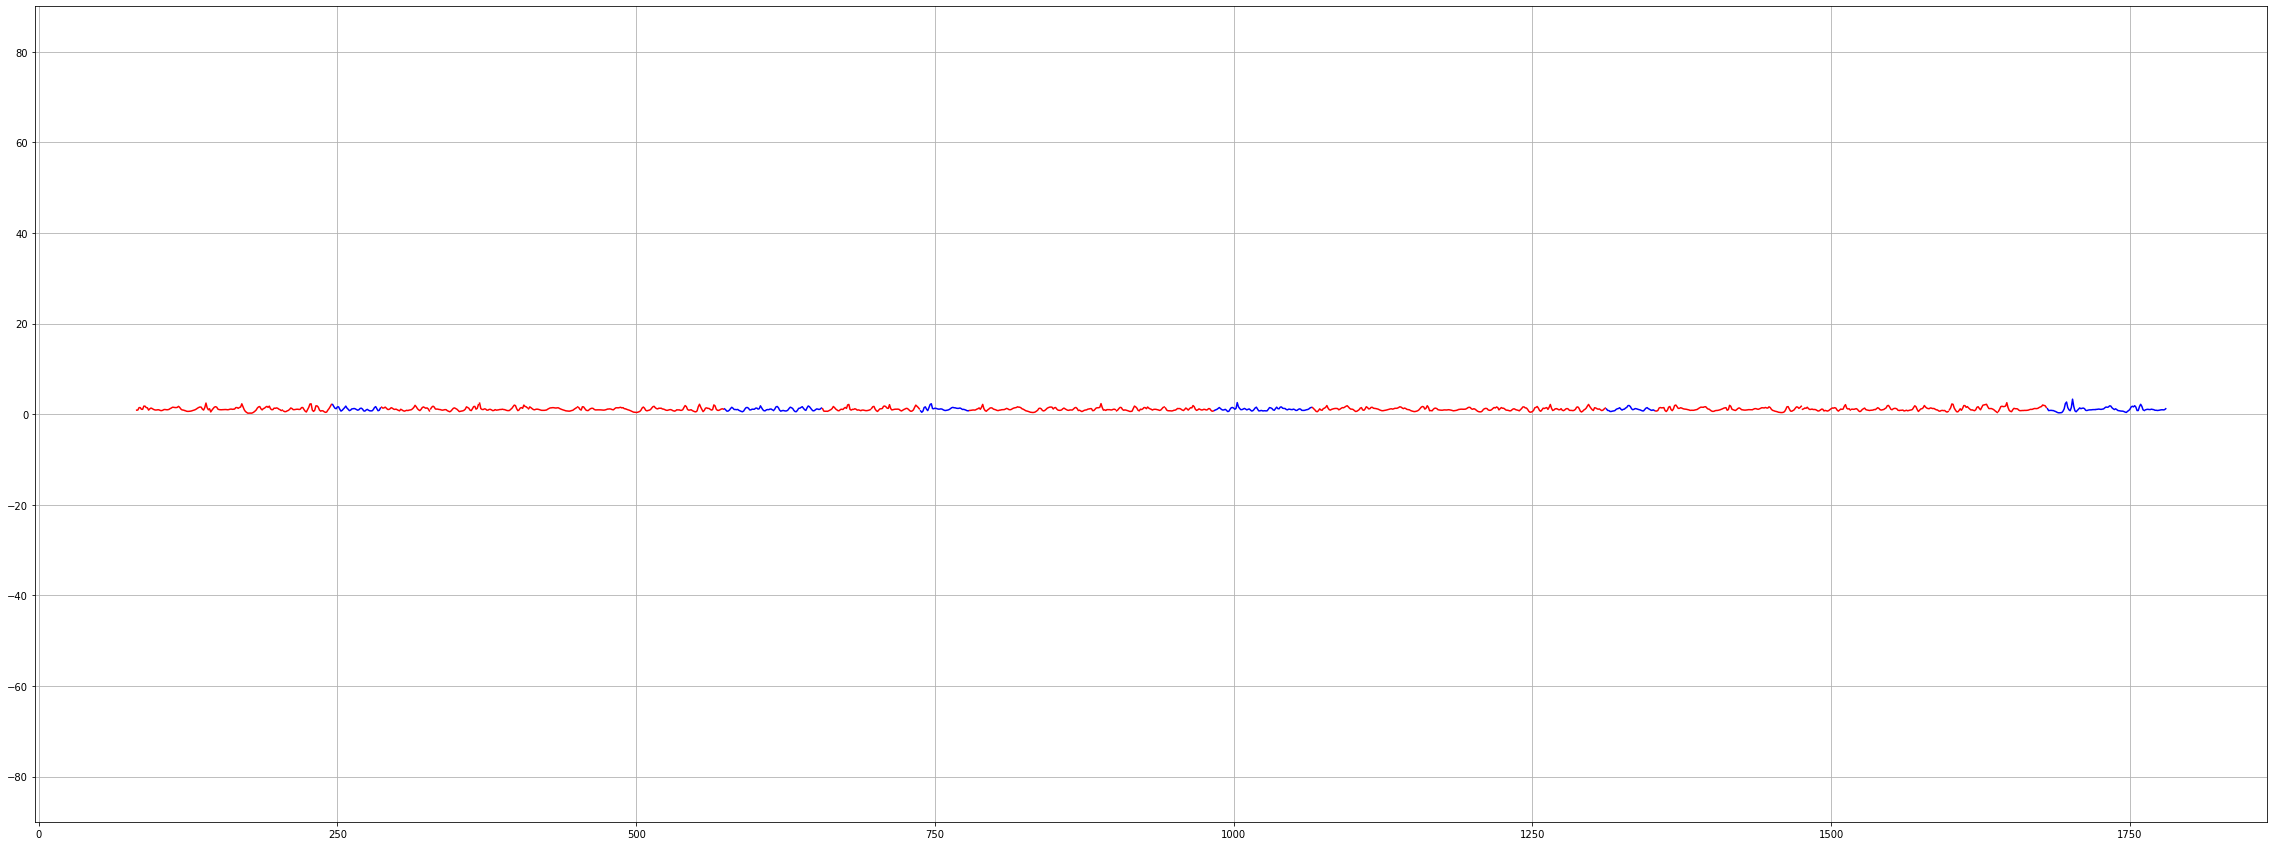

In [28]:
a = int((df.shape[0])/(visual(y_pred_ROC_test)[1]))
b = a

red = 0
blue = 1
red_line = 'r-'
blue_line = 'b-'

steps =[]

for i in range(visual(y_pred_ROC_test)[1]):
    a = a + b
    steps.append(a)
    
for i in range(len(steps)):
    
    plt.figure(num = 1,figsize=(40,15))
    
    if visual(y_pred_ROC_test)[0][i] == red:
#         plt.title(str(visual(y_pred_ROC_test)[0][i]))
        plt.grid('Fine')
        plt.ylim([-90,90])
        plt.plot(df['SMV'][steps[i-1]:steps[i]],red_line)
    
    elif visual(y_pred_ROC_test)[0][i] == blue:
#         plt.title(str(visual(y_pred_ROC_test)[0][i]))
        plt.grid('Fine',)
        plt.ylim([-90,90])
        plt.plot(df['SMV'][steps[i-1]:steps[i]],blue_line)


In [ ]:
print('Predicative Array :',visual(y_pred_ROC_test)[0])
print('Number of Sliding Windows :',visual(y_pred_ROC_test)[1])
print('Probability of a Fall:',(probability_fall(visual(y_pred_ROC_test)[0]))*100,'%')